<a href="https://colab.research.google.com/github/DjengoFang/Financial-Engineering-Ruppert-Matteson-/blob/main/Lab5.19.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
import seaborn as sns

In [43]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from fitter import Fitter, get_common_distributions, get_distributions

In [45]:
url = 'https://raw.githubusercontent.com/DjengoFang/Financial-Engineering-Ruppert-Matteson-/main/datasets/Earnings.csv'
data = pd.read_csv(url)
data.drop('age', axis=1, inplace=True)
data.rename(columns ={'y':'earning'}, inplace=True)
data.head(5)

,earning
0,569.5
1,895.5
2,1111.0
3,1182.0
4,1277.5


In [46]:
data['sqrt'] = np.sqrt(data['earning'])
data['log'] = np.log(data['earning'])
data.head(5)

,earning,sqrt,log
0,569.5,23.864199,6.344759
1,895.5,29.924906,6.797382
2,1111.0,33.331667,7.013016
3,1182.0,34.380227,7.074963
4,1277.5,35.742132,7.152660


In [47]:
data.describe()

,earning,sqrt,log
count,4266.000000,4266.000000,4266.000000
mean,25511.482654,152.194423,9.938138
std,15690.418873,48.465358,0.698120
min,332.500000,18.234583,5.806640
25%,13826.750000,117.587202,9.534360
50%,22690.750000,150.634490,10.029713
75%,33587.500000,183.268928,10.421909
max,83810.500000,289.500432,11.336314


In [48]:
std_data = stats.zscore(data)
std_data.head(5)

,earning,sqrt,log
0,-1.589818,-2.648186,-5.147823
1,-1.569038,-2.523119,-4.499401
2,-1.555302,-2.452818,-4.190487
3,-1.550777,-2.431180,-4.101742
4,-1.544689,-2.403076,-3.990435


# Problem 1

# Qqplot

## Original

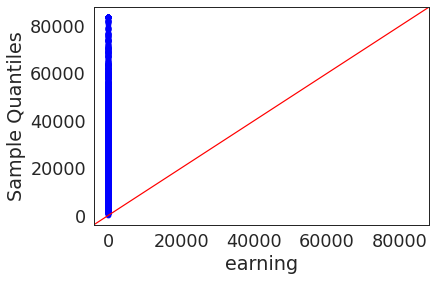

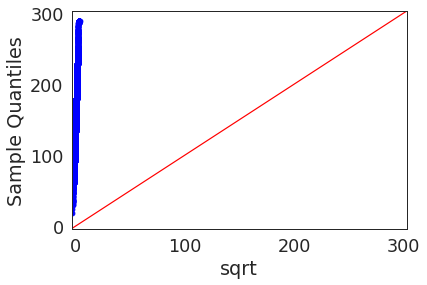

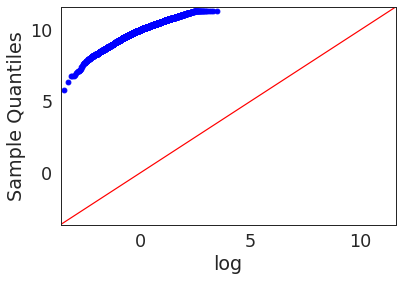

In [49]:
for col in data:
  sm.qqplot(data[col], line ='45')
  plt.xlabel(col)

plt.show()

## Standardized

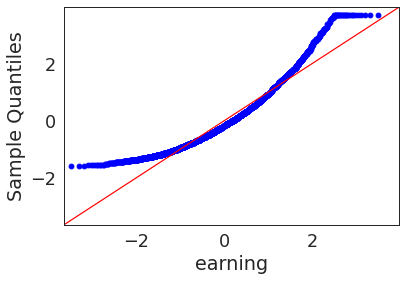

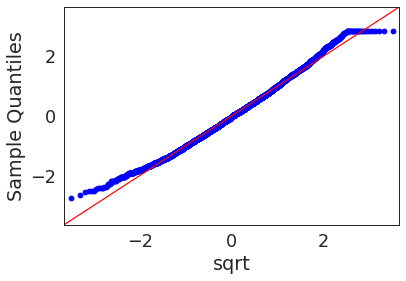

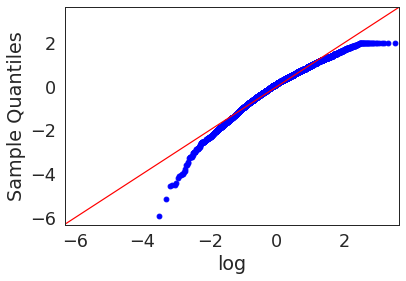

In [50]:
for col in data:
  sm.qqplot(std_data[col], line ='45')
  plt.xlabel(col)

plt.show()

# Boxplot

## Original

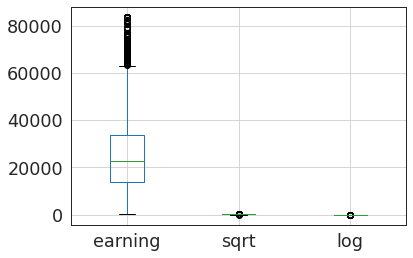

In [51]:
data.boxplot()

## Standardized

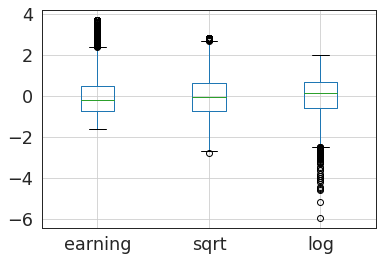

In [52]:
std_data.boxplot()

# Density Plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08dd4fe460>,
      dtype=object)

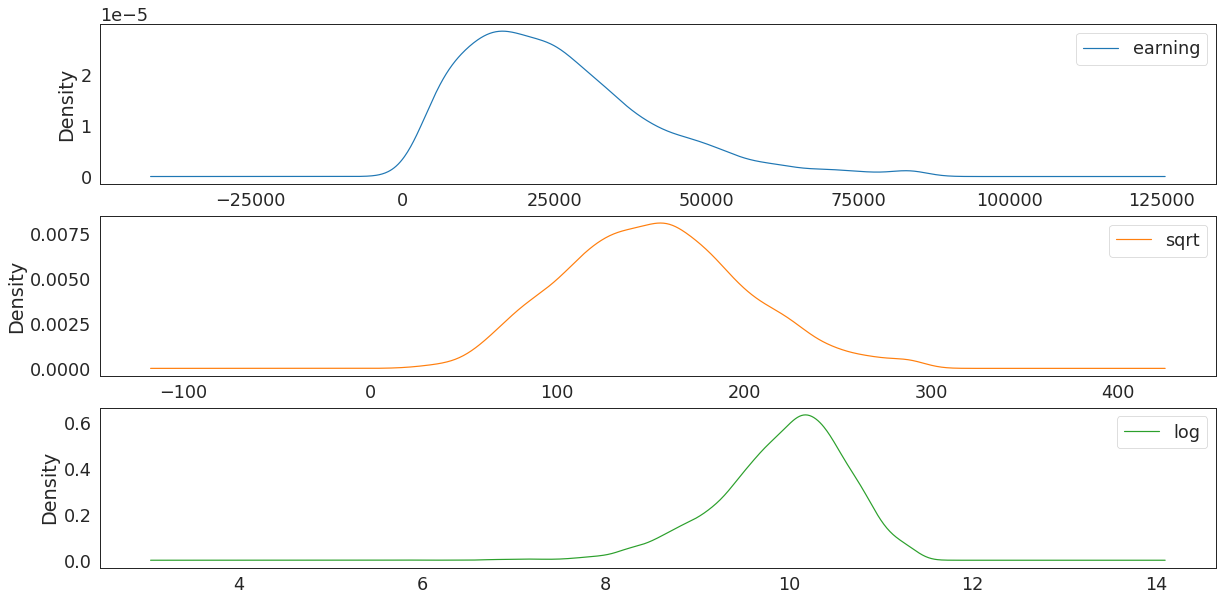

In [53]:
data.plot.kde(subplots=True, sharex=False, figsize=(20,10))

# Problem 2

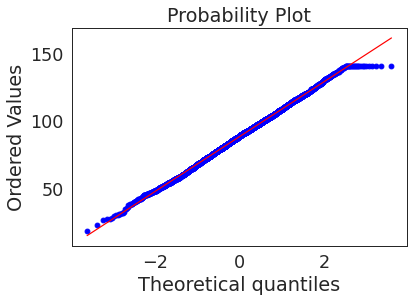

lambda = 0.3440675927396588
95% confidence interval:(0.30759338788369794, 0.3808682141624678)
99% confidence interval:(0.2962002741338471, 0.39249875243738863)


In [54]:
bcdata, lb, con95 = stats.boxcox(data['earning'], alpha=0.05)
bcdata2, lb2, con99 = stats.boxcox(data['earning'], alpha=0.01)
ax1 = plt.subplot(111)
stats.probplot(bcdata, dist=stats.norm, plot=ax1)
plt.show()
print("lambda = "+str(lb))
print("95% confidence interval:"+str(con95))
print("99% confidence interval:"+str(con99))

# Problem 3

## Method 1

### Fit to T Distribution

In [55]:
par, loc, scal = stats.t.fit(data['earning'])
print("shape parameters: {0}\nlocation: {1}\nscale: {2}".format(par, loc, scal))

shape parameters: 17.665375045280058
location: 25478.82683219452
scale: 15591.25458749335


### Fit to Skew Normal Distribution

In [56]:
par, loc, scal = stats.skewnorm.fit(data['earning'])
print("shape parameters: {0}\nlocation: {1}\nscale: {2}".format(par, loc, scal))

shape parameters: 9.818041768416563
location: 4971.172345876438
scale: 25846.38932573462


### Fit to Gamma Distribution



In [57]:
par, loc, scal = stats.gamma.fit(data['earning'])
print("shape parameters: {0}\nlocation: {1}\nscale: {2}".format(par, loc, scal))

shape parameters: 2.634331980607433
location: -285.54989009446444
scale: 9792.62751311658


### Fit to Exponential Distribution

In [58]:
par, loc = stats.expon.fit(data['earning'])
print("shape parameters: {0}\nlocation: {1}".format(par, loc))

shape parameters: 332.5
location: 25178.982653539617


## Method 2
### Reference: https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

In [59]:
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'pow

Plotting Histogram

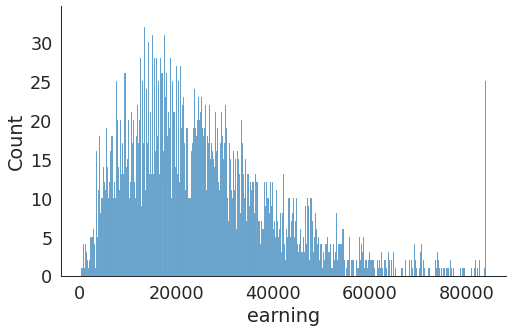

In [60]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data, x="earning", kind="hist", bins = 500, aspect = 1.5)

Data Preparation

In [61]:
earnings = data['earning'].values

Fitting distributions

Fitting 12 distributions: 100%|██████████| 12/12 [00:08<00:00,  1.35it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,3.868181e-10,2400.199182,-128080.938415,inf,0.010245,7.577315e-01
gamma,4.029050e-10,2397.588743,-127915.473580,inf,0.015164,2.776123e-01
skewnorm,6.021885e-10,2398.692380,-126201.097186,inf,0.021935,3.249154e-02
nct,9.067881e-10,2412.338806,-124446.501837,inf,0.028967,1.524226e-03
gennorm,1.876592e-09,2458.613167,-121352.183082,inf,0.076650,3.028093e-22
norm,2.258554e-09,2467.256245,-120570.189424,inf,0.078707,1.966560e-23


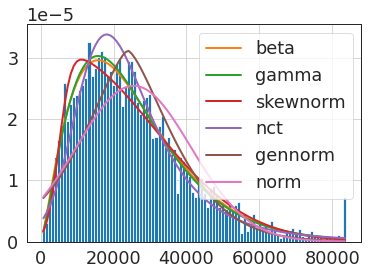

In [80]:
f = Fitter(earnings, distributions=['nct', 't', 'gennorm', 'skewnorm', 'norm', 'skewcauchy', 'lognorm', 'expon', 'weibull_min', 'weibull_max', 'beta', 'gamma'])
f.fit()
# show top 6
f.summary(Nbest=6)

In [76]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 2.3726072749855387,
  'b': 29.358699065242142,
  'loc': 26.187407286953864,
  'scale': 340848.9614993202}}

In [77]:
f.get_best(method = 'aic')

{'expon': {'loc': 332.5, 'scale': 25178.982653539617}}

In [78]:
f.get_best(method = 'bic')

{'beta': {'a': 2.3726072749855387,
  'b': 29.358699065242142,
  'loc': 26.187407286953864,
  'scale': 340848.9614993202}}

In [82]:
f.get_best(method = 'ks_statistic')

{'beta': {'a': 2.3726072749855387,
  'b': 29.358699065242142,
  'loc': 26.187407286953864,
  'scale': 340848.9614993202}}

In [81]:
f.get_best(method = 'ks_pvalue')

{'lognorm': {'s': 8.786081285847274,
  'loc': 332.49999999999994,
  'scale': 5.373091585914343}}